# Tutorial 1: One-Dimensional Sinusoid

Our goal will be to tetrainach a neural network to predict one-dimensional sinusoidal function, given as: 

$
y = x \sin(x)
$

In [87]:
import jenn

### Synthetic Data

In a first step, let's load the test function:

In [88]:
test_function = jenn.synthetic.Sinusoid

Next, let's define the domain over which we will collect synthetic training data:

In [89]:
lb, ub = (-3.14, 3.14)

We will now generate some synthetic data that will be used to train our GENN model later on:

In [90]:
x_train, y_train, dydx_train = test_function.sample(m_lhs=0, m_levels=4, lb=lb, ub=ub)

We also generate some synthetic data that will be used to test the accuracy of the trained model:

In [91]:
x_test, y_test, dydx_test = test_function.sample(m_lhs=30, m_levels=0, lb=lb, ub=ub)

### Training

Training can be done in one line of code. In this case, we'll train both a regular neural networks (nn):

In [92]:
nn = jenn.model.NeuralNet(
    layer_sizes=[1, 12, 1],
).fit(
    x=x_train, 
    y=y_train, 
    lambd=0.1, 
    is_timed=True, 
    is_normalize=True,
)

elapsed time: 0.044 s


and also a gradient-enhanced neural net (genn) for comparison: 

In [93]:
genn = jenn.model.NeuralNet(layer_sizes=[1, 12, 1]).fit(x_train, y_train, dydx_train, lambd=0.1, is_timed=True)

elapsed time: 0.047 s


### Visualization

With only four data points, a near-perfect fit is obtained using gradient-enhancement, whereas a regular neural net fails to capture the response:   

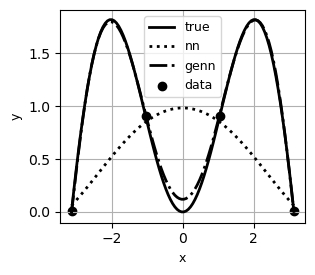

In [94]:
jenn.utils.plot.sensitivity_profiles(
    f=[jenn.synthetic.Sinusoid.evaluate, nn.predict, genn.predict], 
    x_min=x_train.min(), 
    x_max=x_train.max(), 
    x_true=x_train, 
    y_true=y_train, 
    resolution=100, 
    legend=['true', 'nn', 'genn'], 
    xlabels=['x'], 
    ylabels=['y'],
    show_cursor=False
)

### Goodness of Fit: Partials

#### Gradient-Enhanced 

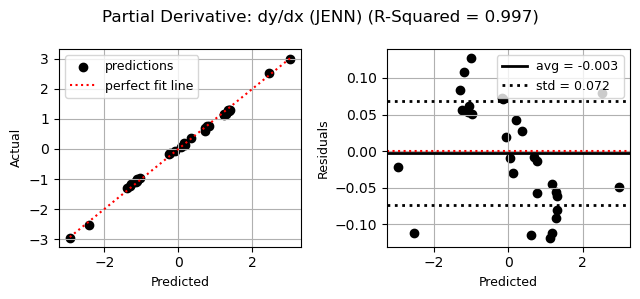

In [95]:
jenn.utils.plot.goodness_of_fit(
    y_true=dydx_test[0], 
    y_pred=genn.predict_partials(x_test)[0], 
    title="Partial Derivative: dy/dx (JENN)"
)

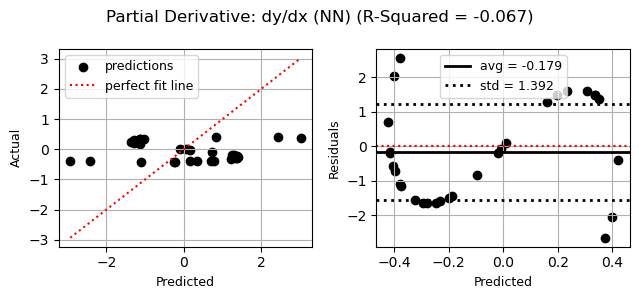

In [96]:
jenn.utils.plot.goodness_of_fit(
    y_true=dydx_test[0], 
    y_pred=nn.predict_partials(x_test)[0], 
    title="Partial Derivative: dy/dx (NN)"
)

### Save / Reload Model

Model parameters are serialized. They can be easily saved as `json` and reloaded later. 

_Save old model_: 

In [97]:
old_model = genn
old_model.save('parameters.json')

_Reload old model_:

In [98]:
new_model = jenn.model.NeuralNet(layer_sizes=[1, 12, 1]).load('parameters.json')

_Verify that old and new model agree_:

In [99]:
assert (new_model.predict(x_test) == old_model.predict(x_test)).all()